<a href="https://colab.research.google.com/github/Harsh015raut/Data-Visualization/blob/main/Spotify_Tracks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install -q opendatasets

In [1]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

## Downloading Dataset from kaggle

In [ ]:
od.download('https://www.kaggle.com/datasets/thedevastator/spotify-tracks-genre-dataset')

## Reading CSV file and converting into DataFrame

In [2]:
df = pd.read_csv('/content/spotify-tracks-genre-dataset/train.csv')
df

Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1              0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2              0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3              0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4              0.618  0.4430  ...    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350  ...   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170  ...   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290  ...   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060  ...   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870  ...   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.97

## Data Cleaning
Now let us make data more neat and structured.We can see that ```track_id``` is of no use to us.Lets remove it completely.Column named ```Unnamed``` is also of no use to us.


In [3]:
nan_counts = df.isna().sum()
print(nan_counts)

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


This Dataset is mostly clean,There are only 3 NaN values in the dataset,so we can remove that row of data.

In [4]:
df.dropna(axis = 0,inplace = True)
df

Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1              0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2              0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3              0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4              0.618  0.4430  ...    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350  ...   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170  ...   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290  ...   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060  ...   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870  ...   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.97

In [5]:
nan_counts = df.isna().sum()
print(nan_counts)

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


Now, there are no NaN values and we can further clean the data by removing unwanted columns.

* Now our data is cleaned and no NaN values are there in our data.

In [6]:
df.drop(["Unnamed: 0", "track_id", 'track_name', 'explicit', 'mode', 'time_signature','track_genre'], axis = 1, inplace=True)
df

artists  \
0                  Gen Hoshino   
1                 Ben Woodward   
2       Ingrid Michaelson;ZAYN   
3                 Kina Grannis   
4             Chord Overstreet   
...                        ...   
113995           Rainy Lullaby   
113996           Rainy Lullaby   
113997           Cesária Evora   
113998        Michael W. Smith   
113999           Cesária Evora   

                                               album_name  popularity  \
0                                                  Comedy          73   
1                                        Ghost (Acoustic)          55   
2                                          To Begin Again          57   
3       Crazy Rich Asians (Original Motion Picture Sou...          71   
4                                                 Hold On          82   
...                                                   ...         ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...          21   
113996  #mindfulness - Soft Rain for Mindful Meditatio...          22   
113997                                            Best Of          22   
113998                                  Change Your World          41   
113999                                     Miss Perfumado          22   

        duration_ms  danceability  energy  key  loudness  speechiness  \
0            230666         0.676  0.4610    1    -6.746       0.1430   
1            149610         0.420  0.1660    1   -17.235       0.0763   
2            210826         0.438  0.3590    0    -9.734       0.0557   
3            201933         0.266  0.0596    0   -18.515       0.0363   
4            198853         0.618  0.4430    2    -9.681       0.0526   
...             ...           ...     ...  ...       ...          ...   
113995       384999         0.172  0.2350    5   -16.393       0.0422   
113996       385000         0.174  0.1170    0   -18.318       0.0401   
113997       271466         0.629  0.3290    0   -10.895       0.0420   
113998       283893         0.587  0.5060    7   -10.889       0.0297   
113999       241826         0.526  0.4870    1   -10.204       0.0725   

        acousticness  instrumentalness  liveness  valence    tempo  
0             0.0322          0.000001    0.3580   0.7150   87.917  
1             0.9240          0.000006    0.1010   0.2670   77.489  
2             0.2100          0.000000    0.1170   0.1200   76.332  
3             0.9050          0.000071    0.1320   0.1430  181.740  
4             0.4690          0.000000    0.0829   0.1670  119.949  
...              ...               ...       ...      ...      ...  
113995        0.6400          0.928000    0.0863   0.0339  125.995  
113996        0.9940          0.976000    0.1050   0.0350   85.239  
113997        0.8670          0.000000    0.0839   0.7430  132.378  
113998        0.3810          0.000000    0.2700   0.4130  135.960  
113999        0.6810          0.000000    0.0893   0.7080   79.198  

[113999 rows x 14 columns]

# Defining functions for Charts
* It will make us easy to plot graphs in our own way

In [7]:
def plotly_hist(data,x,y= None):
  color_sequence = np.random.choice(px.colors.qualitative.Plotly, size=1)[0]
  fig = px.histogram(data,x,y,color_discrete_sequence=[color_sequence])
  fig.update_layout(title=f'Histogram of {x}',bargap = 0.2)
  fig.show()

def sn_hist(data, X, Y=None,Kde=None):
  plt.figure(figsize=(18,6))
  sns.histplot(data,x= X,y=Y,kde = Kde, palette='Bright')

# Liveness
* Liveness is defined as a quality that captures the sense that the music is being performed in the present moment.In our dataset, there are very few songs which live upto the expectations of liveness

In [8]:
#Q.1 Liveness values for songs
plotly_hist(df,'liveness')

<ipython-input-7-ea6f404c8917>:9: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



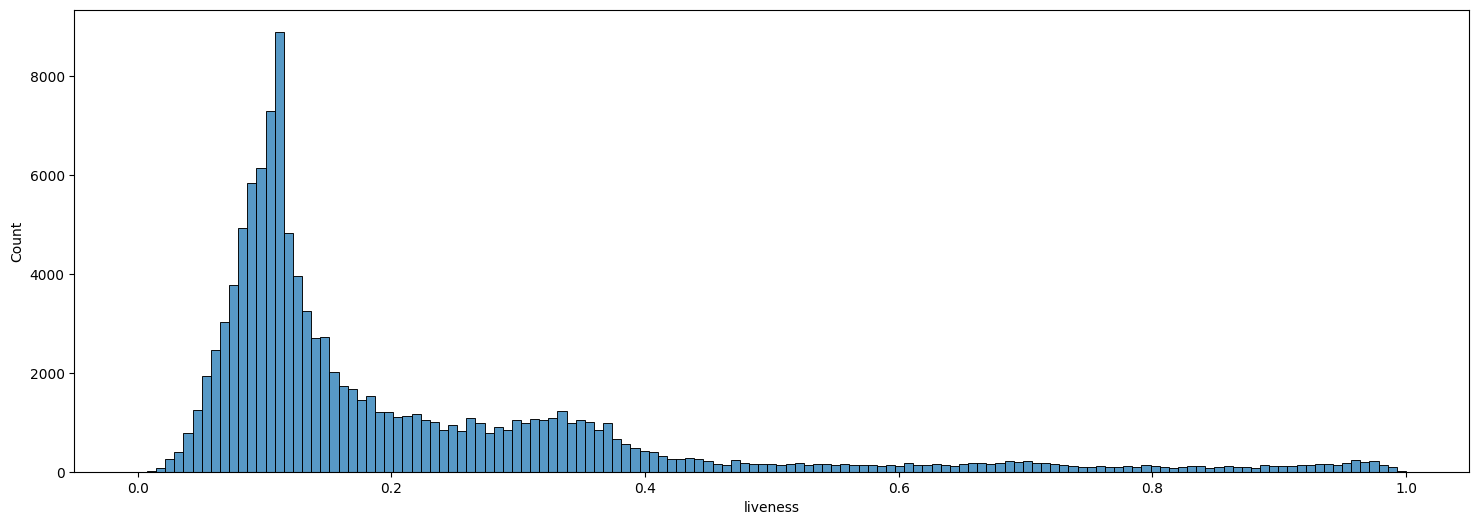

In [9]:
sn_hist(df,'liveness')

(array([30373., 44728., 13774., 12500.,  3246.,  1999.,  2253.,  1738.,
         1365.,  2023.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

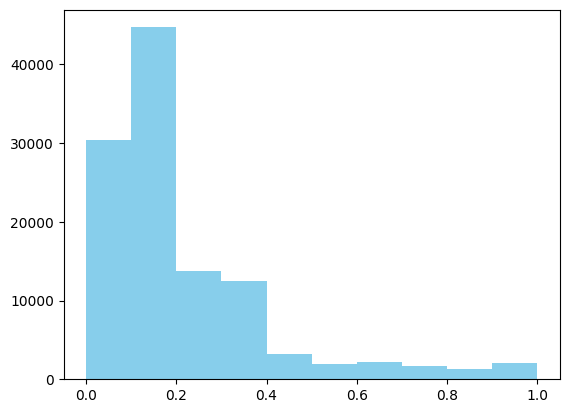

In [10]:
plt.hist(df['liveness'],color= 'skyblue',bins = 10)

#Key
*  In music theory, the key refers to the tonal center or the note upon which a piece of music is centered. It determines the overall pitch and tonality of a musical composition.
* We can see that the songs based on ```key 7``` are the most popular followed by songs based on ```key 0```

In [11]:
#Q.2 Which musical keys are most commonly associated with popular songs?
plotly_hist(df,x='key',y='popularity')

In [12]:
fig = px.pie(df,values = 'popularity',names = 'key')
fig.show()

##Danceability
* It refers to a metric that quantifies how suitable a track is for dancing based on various musical elements. Spotify assigns a value to each track called "danceability" on a scale from 0.0 to 1.0, where 0.0 is least danceable and 1.0 is most danceable.

In [13]:
#Q3.Count of danceability
plotly_hist(df,'danceability')

In [ ]:
sn_hist(df,'danceability',Kde = True)

# Energy
* Energy is a metric that represents the intensity and activity of a song. It measures the perceptual intensity and activity of the music, and it is expressed as a value between 0.0 and 1.0. A higher energy value suggests more energetic and intense music, while a lower value indicates a more calm and subdued atmosphere.

In [14]:
#Q.4 How energetic are the Songs?
plotly_hist(df, x = 'energy')

<Figure size 1800x800 with 0 Axes>

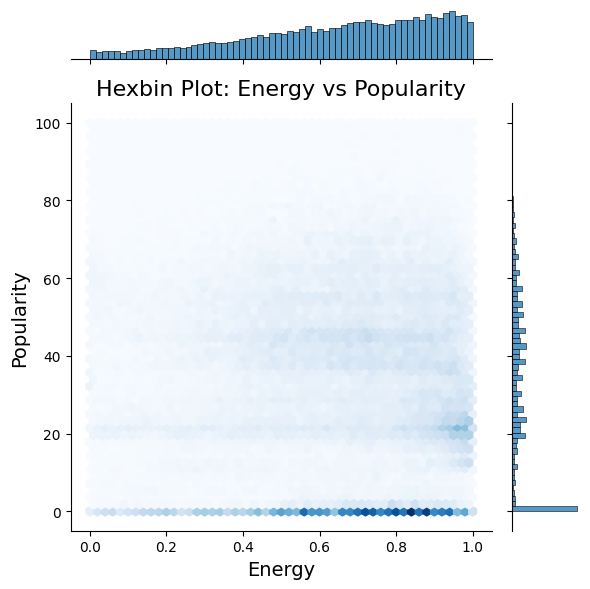

In [15]:
#Q.5 Is there a relation between energy and popularity of song

plt.figure(figsize=(18, 8))  # Adjust the height to create more space for labels
sns.jointplot(x='energy', y='popularity', data=df, gridsize=50, cmap='Blues', kind="hex")

plt.title('Hexbin Plot: Energy vs Popularity', fontsize=16)
plt.xlabel('Energy', fontsize=14)
plt.ylabel('Popularity', fontsize=14)

plt.tight_layout()  # Adjust layout for better spacing

plt.show()

In [16]:
#Q.6 What is the predominant range of loudness levels among the recorded sounds?
plotly_hist(df, 'loudness')

The predominant range of loudness levels among the recorded sounds is loudness between -5.6 and -5.7 where 1663 songs are there.

In [17]:
#.7.Within which acousticness range do the majority of the recorded sounds fall?
plotly_hist(df,'acousticness')

The most 20 thousand songs lie in acousticness range between -0.005 and 0.00499

# Valence
*  "valence" is a metric that represents the musical positiveness conveyed by a track. It is measured on a scale from 0.0 to 1.0, where 0.0 represents a more negative or sad musical mood, and 1.0 represents a more positive or happy musical mood.

In [18]:
#Q.8 What is the general trend in valence ?
plotly_hist(df,'valence')

<ipython-input-7-ea6f404c8917>:9: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



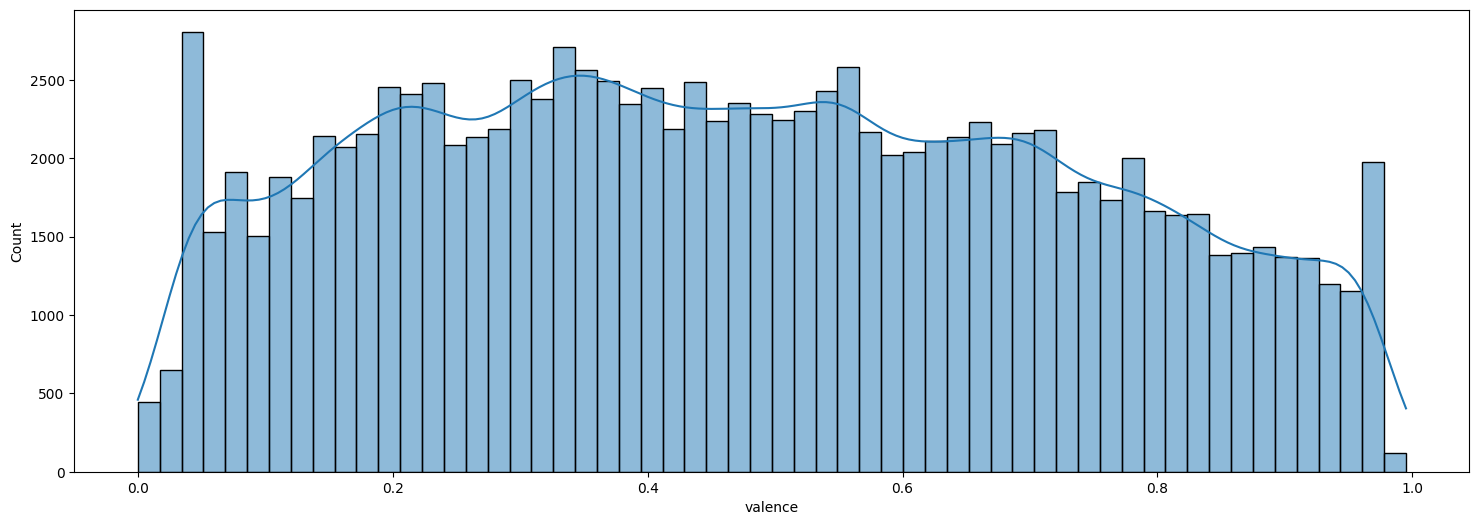

In [19]:
sn_hist(df,X = 'valence',Kde = True)

# Tempo
* Tempo is a metric that represents the overall speed or pace of a musical piece. It is measured in beats per minute (BPM). The tempo provides information about how fast or slow a song feels when listened to.

In [20]:
#Q.9What is the average tempo across various music genres in the dataset, and are there notable differences in the tempo distribution between different genres?
plotly_hist(df, 'tempo')

In [21]:
numerical = df.select_dtypes(include=np.number).columns.tolist()
numerical

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

Let us see correlation between numerical attributes

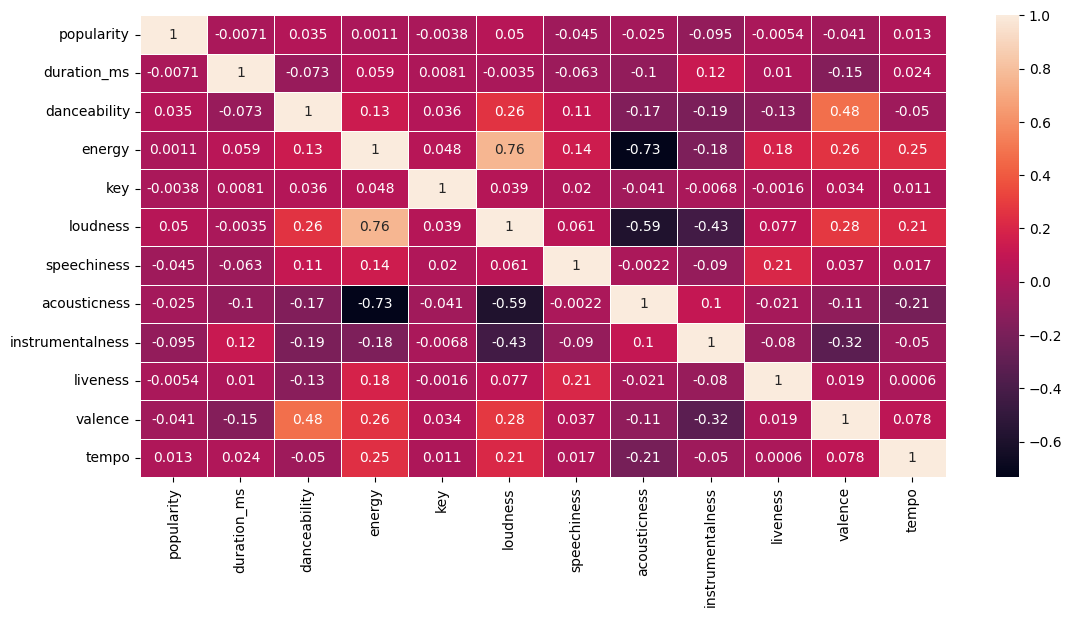

In [22]:
#Q.10 What is correlation between each metric?
df_nums = df.copy()
df_nums = df_nums[numerical]

plt.figure(figsize=(13,6))
corr_matrix = df_nums.corr()
sns.heatmap(corr_matrix, linewidths=.7, annot=True)
plt.show()